In [1]:
import sys
sys.path.append("HyperNetX")
import matplotlib.pyplot as plt
import networkx as nx
import hypernetx as hnx
from hgDecompose.hgDecompose import HGDecompose
from hgDecompose.newhgDecompose import HGDecompose as newHgDecomp

In [2]:
scenes = {
    0: ('FN', 'TH'),
    1: ('TH', 'JV'),
    2: ('BM', 'FN', 'JA'),
    3: ('JV', 'JU', 'CH', 'BM'),
    4: ('JU', 'CH', 'BR', 'CN', 'CC', 'JV', 'BM'),
    5: ('TH', 'GP'),
    6: ('GP', 'MP'),
    7: ('MA', 'GP')
}

H = hnx.Hypergraph(scenes)

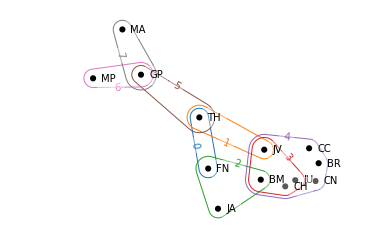

In [3]:
# Draw the hypergraph! For more on using all of the parameters
# of the draw function see the Visualization tutorial
from matplotlib import pyplot as plt
hnx.draw(H)
plt.show()

{'BM', 'FN'} | {'JU', 'JA', 'FN', 'CN', 'CC', 'CH', 'JV', 'BR'}
{'MP', 'TH', 'MA'}
{'JU', 'JA', 'FN', 'CN', 'CC', 'CH', 'JV', 'BR'}
1 | 3 | 1
set()


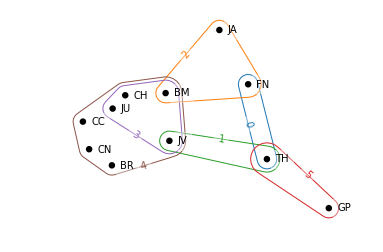

In [4]:
""" Test our hypergraph class """
from hgDecompose.Hypergraph import Hypergraph

h = Hypergraph(_edgedict = scenes)

print(h.neighbors('JA'),'|',h.neighbors('BM'))
# subg = h.strong_subgraph(['MA','GP','MP','TH','JA']).get_hnx_format()
# hnx.draw(subg)
print(h.strong_subgraph(['MA','GP','MP','TH','JA']).neighbors('GP'))
print(h.neighbors('BM'))
print(h.degree('CN'),'|',h.degree('BM'),'|',h.degree('MP'))
print(h.neighbors('XY'))
hnx.draw(h.strong_subgraph(['FN', 'TH', 'JV', 'BM', 'JA', 'JU', 'CH', 'BR', 'CN', 'CC', 'GP']).get_hnx_format())
# for v in h.node_iterator():
#     print(v)

# for e in h.edge_iterator():
#     print(e)

# print(h.e_indices)
# print(h.e_nodes)

# hnx_h = h.get_hnx_format()
# hnx.draw(hnx_h)



In [5]:
subg = h.strong_subgraph(['FN', 'TH', 'JV', 'BM', 'JA', 'JU', 'CH', 'BR', 'CN', 'CC', 'GP'])
print(subg.i)
print(h.i)
cpy_h = h
print(cpy_h.i)

20
24
24


naive nbr
-----

In [6]:
hgDecompose = HGDecompose()
hgDecompose.naiveNBR(H, verbose=False)
hgDecompose.core

{'MP': 1,
 'MA': 1,
 'GP': 1,
 'JA': 2,
 'TH': 2,
 'FN': 2,
 'JU': 6,
 'CN': 6,
 'BM': 6,
 'CC': 6,
 'CH': 6,
 'JV': 6,
 'BR': 6}

In [7]:
hgDecompose.execution_time, hgDecompose.bucket_update_time, hgDecompose.neighborhood_call_time, hgDecompose.degree_call_time

(0.003778219223022461, 1.5020370483398438e-05, 6.461143493652344e-05, 0)

In [8]:
hgDecompose.num_bucket_update, hgDecompose.num_neighborhood_computation, hgDecompose.num_degree_computation

(13, 13, 0)

In [9]:
hgDecompose = newHgDecomp()
hgDecompose.naiveNBR(h, verbose=False)
hgDecompose.core

{'MP': 1,
 'MA': 1,
 'GP': 1,
 'JA': 2,
 'TH': 2,
 'FN': 2,
 'JU': 6,
 'CN': 6,
 'BM': 6,
 'CC': 6,
 'CH': 6,
 'JV': 6,
 'BR': 6}

In [10]:
hgDecompose = newHgDecomp()
hgDecompose.naiveNBR(h, verbose=False)
hgDecompose.core

{'MP': 1,
 'MA': 1,
 'GP': 1,
 'JA': 2,
 'TH': 2,
 'FN': 2,
 'JU': 6,
 'CN': 6,
 'BM': 6,
 'CC': 6,
 'CH': 6,
 'JV': 6,
 'BR': 6}

In [11]:
hgDecompose.execution_time, hgDecompose.bucket_update_time, hgDecompose.neighborhood_call_time, hgDecompose.degree_call_time

(0.00020813941955566406, 1.0728836059570312e-05, 1.5735626220703125e-05, 0)

In [12]:
hgDecompose.execution_time, hgDecompose.bucket_update_time, hgDecompose.neighborhood_call_time, hgDecompose.degree_call_time

(0.00020813941955566406, 1.0728836059570312e-05, 1.5735626220703125e-05, 0)

In [13]:
hgDecompose.num_bucket_update, hgDecompose.num_neighborhood_computation, hgDecompose.num_degree_computation

(13, 13, 0)

naive deg
------

In [14]:
hgDecompose = HGDecompose()
hgDecompose.naiveDeg(H, verbose=False)
hgDecompose.core

{'JA': 1,
 'BR': 1,
 'MP': 1,
 'MA': 1,
 'FN': 1,
 'JU': 1,
 'CN': 1,
 'CC': 1,
 'GP': 1,
 'CH': 1,
 'BM': 1,
 'JV': 1,
 'TH': 1}

In [15]:
hgDecompose.execution_time, hgDecompose.bucket_update_time, hgDecompose.neighborhood_call_time, hgDecompose.degree_call_time

(0.0064411163330078125, 2.765655517578125e-05, 0, 9.5367431640625e-05)

In [16]:
hgDecompose.num_bucket_update, hgDecompose.num_neighborhood_computation, hgDecompose.num_degree_computation

(16, 0, 16)

In [17]:
hgDecompose = newHgDecomp()
hgDecompose.naiveDeg(h, verbose=False)
hgDecompose.core

{'JA': 1,
 'BR': 1,
 'MP': 1,
 'MA': 1,
 'FN': 1,
 'JU': 1,
 'CN': 1,
 'CC': 1,
 'GP': 1,
 'CH': 1,
 'BM': 1,
 'JV': 1,
 'TH': 1}

In [18]:
hgDecompose.execution_time, hgDecompose.bucket_update_time, hgDecompose.neighborhood_call_time, hgDecompose.degree_call_time

(0.0002529621124267578, 1.33514404296875e-05, 0, 1.3828277587890625e-05)

In [19]:
hgDecompose.num_bucket_update, hgDecompose.num_neighborhood_computation, hgDecompose.num_degree_computation

(16, 0, 16)

improved algorithm (1)
----------

In [20]:
hgDecompose = HGDecompose()
hgDecompose.improvedNBR(H, verbose=False)
hgDecompose.core

{'MP': 1,
 'MA': 1,
 'GP': 1,
 'JA': 2,
 'FN': 2,
 'TH': 2,
 'JU': 6,
 'CN': 6,
 'BM': 6,
 'CC': 6,
 'CH': 6,
 'JV': 6,
 'BR': 6}

In [21]:
hgDecompose.execution_time, hgDecompose.bucket_update_time, hgDecompose.neighborhood_call_time, hgDecompose.degree_call_time

(0.005022287368774414, 1.71661376953125e-05, 6.341934204101562e-05, 0)

In [22]:
hgDecompose = newHgDecomp()
hgDecompose.improvedNBR(h, verbose=False)
hgDecompose.core

{'MP': 1,
 'MA': 1,
 'GP': 1,
 'JA': 2,
 'FN': 2,
 'TH': 2,
 'JU': 6,
 'CN': 6,
 'BM': 6,
 'CC': 6,
 'CH': 6,
 'JV': 6,
 'BR': 6}

In [23]:
hgDecompose.execution_time, hgDecompose.bucket_update_time, hgDecompose.neighborhood_call_time, hgDecompose.degree_call_time

(0.0003190040588378906, 1.1682510375976562e-05, 1.4781951904296875e-05, 0)

In [24]:
hgDecompose = HGDecompose()
hgDecompose.improved2NBR(H, verbose=False)
hgDecompose.core

{'JV': 6,
 'BM': 6,
 'JU': 6,
 'CH': 6,
 'BR': 6,
 'CN': 6,
 'CC': 6,
 'TH': 2,
 'JA': 2,
 'FN': 2,
 'MP': 1,
 'MA': 1,
 'GP': 1}

In [25]:
hgDecompose.execution_time, hgDecompose.bucket_update_time, hgDecompose.neighborhood_call_time, hgDecompose.degree_call_time

(0.009204864501953125, 9.298324584960938e-06, 0.00025272369384765625, 0)

In [26]:
hgDecompose = newHgDecomp()
hgDecompose.improved2NBR(h, verbose=False)
hgDecompose.core

{'JV': 6,
 'BM': 6,
 'JU': 6,
 'CH': 6,
 'BR': 6,
 'CN': 6,
 'CC': 6,
 'TH': 2,
 'JA': 2,
 'FN': 2,
 'MP': 1,
 'MA': 1,
 'GP': 1}

In [27]:
hgDecompose.execution_time, hgDecompose.bucket_update_time, hgDecompose.neighborhood_call_time, hgDecompose.degree_call_time

(0.0007059574127197266, 2.5033950805664062e-05, 9.870529174804688e-05, 0)

In [2]:
from hgDecompose import utils
# datasets = ["syn", "bin_1", "bin_2", "bin_4", "bin_5"]
datasets = ["enron","contact","congress"]
for d in datasets:
    H = utils.get_hg_hnx(d)
    deg_stat = utils.get_degree_stats(H)
    dim_stat = utils.get_dim_stats(H)
    nbr_stat = utils.get_nbr_stats(H)
    print(d)
    print('N = ',utils.get_N(H))
    print('M = ',utils.get_M(H))
    print('deg stats: ',deg_stat)
    print('dim stats: ',dim_stat)
    print('nbr stats: ',nbr_stat)
    print("**************")

enron
N =  5734
M =  5734
deg stats:  {'mean': 1.0, 'max': 1.0, 'min': 1.0, '25%': 1.0, '50%': 1.0, '75%': 1.0, 'std': 0.0}
dim stats:  {'mean': 1.0, 'max': 1.0, 'min': 1.0, '25%': 1.0, '50%': 1.0, '75%': 1.0, 'std': 0.0}
nbr stats:  {'mean': 0.0, 'max': 0.0, 'min': 0.0, '25%': 0.0, '50%': 0.0, '75%': 0.0, 'std': 0.0}
**************
contact
N =  242
M =  12704
deg stats:  {'mean': 126.97933884297521, 'max': 261.0, 'min': 28.0, '25%': 85.5, '50%': 123.5, '75%': 162.75, 'std': 55.26221525071022}
dim stats:  {'mean': 2.4188444584382873, 'max': 5.0, 'min': 2.0, '25%': 2.0, '50%': 2.0, '75%': 3.0, 'std': 0.5498333095037446}
nbr stats:  {'mean': 68.73553719008264, 'max': 134.0, 'min': 20.0, '25%': 47.0, '50%': 68.5, '75%': 88.75, 'std': 26.625968852702506}
**************
congress
N =  1718
M =  83105
deg stats:  {'mean': 426.25145518044235, 'max': 3964.0, 'min': 1.0, '25%': 123.0, '50%': 273.0, '75%': 526.0, 'std': 475.7929759391534}
dim stats:  {'mean': 8.8117441790506, 'max': 25.0, 'min': 